# PhenoCam All-Image Files

Here's a python notebook demonstrating how to read in and plot an "all image" file using python.  In this case I'm using the all image file from the alligatorriver site.  The all image files are in CSV format and can be read directly from the site using a URL.  First try reading directly from a file.

In [2]:
%matplotlib inline

import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import requests
import StringIO

# set matplotlib  style
matplotlib.style.use('ggplot')

sitename = 'alligatorriver'
roiname = 'DB_0001'
infile = "{}_{}_roistats.csv".format(sitename, roiname)
print infile

alligatorriver_DB_0001_roistats.csv


While the data can be read directly from a URL we'll start by doing the simple thing of reading the CSV file directly from our local disk.

In [3]:
with open(infile,'r') as fd:
    df = pd.read_csv(fd, comment='#', parse_dates=[[0,1]])

df.head()

,date_local_std_time,doy,filename,solar_elev,exposure,mask_index,gcc,rcc,r_mean,r_std,...,b_5_qtl,b_10_qtl,b_25_qtl,b_50_qtl,b_75_qtl,b_90_qtl,b_95_qtl,r_g_correl,g_b_correl,b_r_correl
0,2012-05-03 11:31:16,124,alligatorriver_2012_05_03_113116.jpg,69.10992,NaN,1,0.41439,0.38247,106.48861,42.40910,...,0,8,29,53,79,106,124,0.98528,0.91897,0.93210
1,2012-05-03 12:01:10,124,alligatorriver_2012_05_03_120110.jpg,70.15241,NaN,1,0.41724,0.38322,106.30031,43.31611,...,0,6,28,52,77,105,124,0.98469,0.91892,0.93140
2,2012-05-06 07:31:09,127,alligatorriver_2012_05_06_073109.jpg,27.97539,NaN,1,0.42063,0.36155,95.32416,27.79097,...,18,27,41,56,72,89,100,0.98217,0.90238,0.93948
3,2012-05-06 08:01:09,127,alligatorriver_2012_05_06_080109.jpg,34.05378,NaN,1,0.42346,0.37997,99.63057,29.50702,...,10,19,34,50,67,85,98,0.98120,0.90373,0.93859
4,2012-05-06 08:31:09,127,alligatorriver_2012_05_06_083109.jpg,40.10441,NaN,1,0.42246,0.37324,94.99911,30.65976,...,8,18,33,50,68,88,101,0.98070,0.90047,0.93602


Okay, that worked.  The date times seem to be a problem for plotting in pandas so I'm going to drop back to using matplotlib directly.

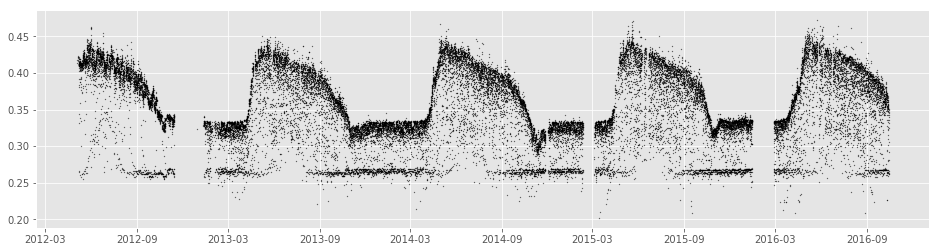

In [4]:
x = df.date_local_std_time
y = df.gcc
plt.figure(figsize=[16,4])
plt.plot_date(x, y, 'k.', markersize=.5)

That was pretty simple.  Now try to read directly from a URL to see if we get the same result.  This has the advantage that you always get the latest version of the file which is updated nightly.

In [5]:
url = "https://phenocam.sr.unh.edu/data/archive/{}/ROI/{}"
url = url.format(sitename, infile)
print url

https://phenocam.sr.unh.edu/data/archive/alligatorriver/ROI/alligatorriver_DB_0001_roistats.csv


In [6]:
response = requests.get(url)
fd = StringIO.StringIO(response.text)
df = pd.read_csv(fd, comment='#', parse_dates=[[0,1]])
fd.close
df[0:3]

,date_local_std_time,doy,filename,solar_elev,exposure,mask_index,gcc,rcc,r_mean,r_std,...,b_5_qtl,b_10_qtl,b_25_qtl,b_50_qtl,b_75_qtl,b_90_qtl,b_95_qtl,r_g_correl,g_b_correl,b_r_correl
0,2012-05-03 11:31:16,124,alligatorriver_2012_05_03_113116.jpg,69.10992,NaN,1,0.41439,0.38247,106.48861,42.40910,...,0.0,8.0,29.0,53.0,79.0,106.0,124.0,0.98528,0.91897,0.93210
1,2012-05-03 12:01:10,124,alligatorriver_2012_05_03_120110.jpg,70.15241,NaN,1,0.41724,0.38322,106.30031,43.31611,...,0.0,6.0,28.0,52.0,77.0,105.0,124.0,0.98469,0.91892,0.93140
2,2012-05-06 07:31:09,127,alligatorriver_2012_05_06_073109.jpg,27.97539,NaN,1,0.42063,0.36155,95.32416,27.79097,...,18.0,27.0,41.0,56.0,72.0,89.0,100.0,0.98217,0.90238,0.93948


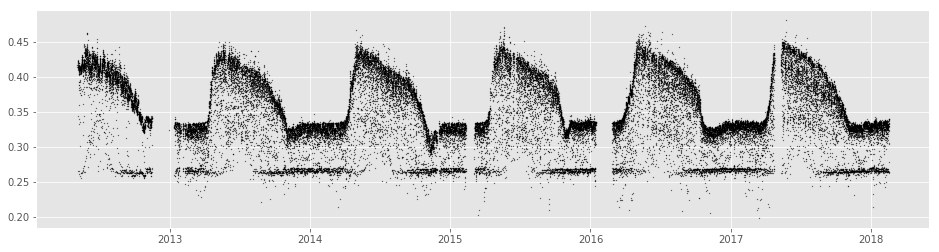

In [7]:
x = df.date_local_std_time
y = df.gcc
plt.figure(figsize=[16,4])
plt.plot_date(x, y, 'k.', markersize=.5)

I finally figured out how to plot this using pandas.  It's pretty simple once you know what you need to do.

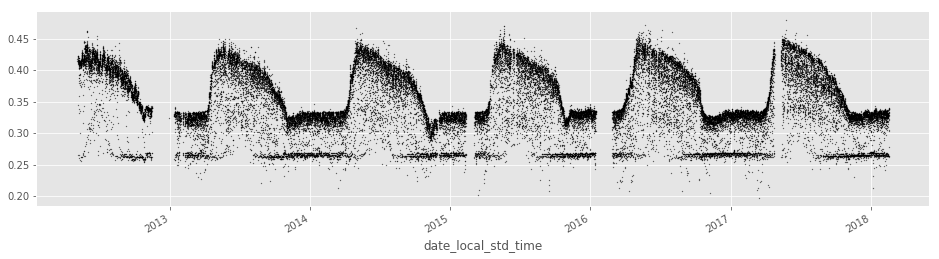

In [8]:
df.index = df.date_local_std_time
df.gcc.plot(style='k.', markersize=.5, figsize=[16,4])

Once the data frame is indexed with the datetime other values can also be plotted as a function of time.

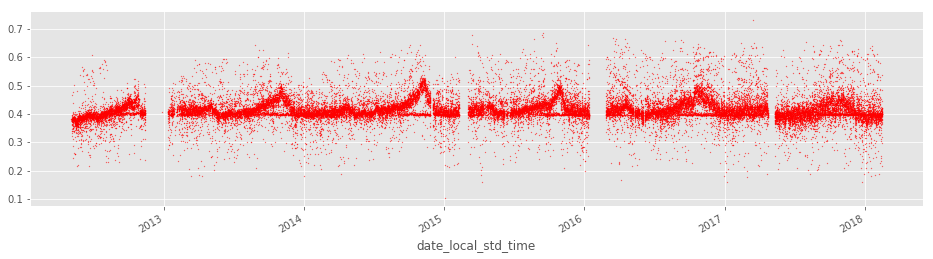

In [9]:
df.rcc.plot(style='r.', markersize=.5, figsize=[16,4])